# Part 3: regression

In [37]:
import matplotlib.pyplot as plt
from step_02_load_data.main import load
from step_03_clean_data.clean import clean
from step_04_feature_engineering.feature_engineering import feature_engineering_0
import step_05_compute_models.xgboost_experiments
import step_05_compute_models.linear_regression_experiments
import step_05_compute_models.random_forest_experiments

import pandas as pd
import numpy as np

## load and clean the data

In [38]:
df=load()
df=clean(df)


/home/dimi/BeCode/BeCode-real-estate-ML-cookiecutter/src/step_03_clean_data/clean.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['rent'][('Target','Price')]=df.loc['rent'].apply(x1000, axis=1)


In [39]:
df.loc['rent'].head()

Target         Group 1                            Group 2            \
         Price Number of rooms Living Area Fully equipped kitchen Furnished   
Id                                                                            
1610665  485.0             1.0        40.0                   True     False   
2718948  790.0             2.0       140.0                   True     False   
3229637  900.0             3.0       103.0                  False     False   
3860205  520.0             2.0        50.0                   True     False   
4141598  760.0             1.0        55.0                   True     False   

                                                                         \
        Open fire Terrace Area of the terrace Garden Area of the garden   
Id                                                                        
1610665     False   False                 0.0  False                0.0   
2718948     False   False                 0.0  False                0.0   
3229637     False   False                 0.0   True              330.0   
3860205     False   False                 0.0  False                0.0   
4141598     False    True                30.0   True            10000.0   

                                                             \
        Surface of the land Number of facades Swimming pool   
Id                                                            
1610665                 0.0               2.0         False   
2718948                 0.0               2.0         False   
3229637               400.0               3.0         False   
3860205                 0.0               2.0         False   
4141598                 0.0               2.0         False   

                      Group 1 Spatial      Group 2       misc  
        State of the building zipcode         type   Price/m2  
Id                                                             
1610665     \nExcellentétat\n    4020       Studio  12.125000  
2718948               \nBon\n    3200  Appartement   5.642857  
3229637               \nBon\n    7020       Maison   8.737864  
3860205               \nBon\n    6900  Appartement  10.400000  
4141598       \nÀrafraîchir\n    1470  Appartement  13.818182

In [48]:
for index,row in df.iterrows():
    if index[0]=='rent':
        if (row[('misc','Price/m2')]<7) or (row[('misc','Price/m2')]>30):
            #print(row)
            df.drop(index, inplace=True)

<AxesSubplot: >

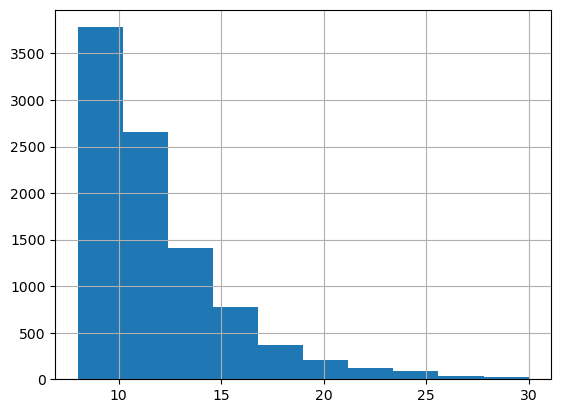

In [49]:
df.loc['rent'][('misc','Price/m2')].hist()

/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1306: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1307: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

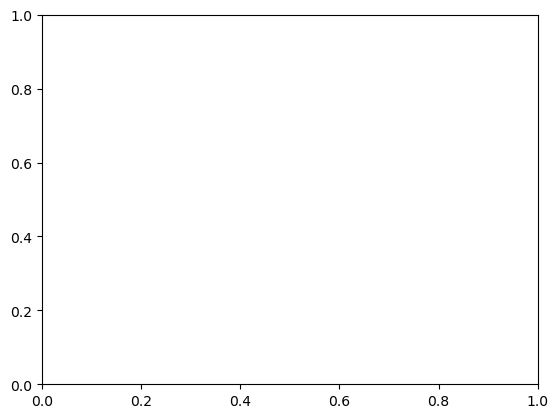

In [54]:
plt.boxplot(df.loc['rent'], vert=False)
plt.show()


In [51]:
df.loc[df[('misc','Price/m2')].nsmallest(25).index]

Target         Group 1                            Group 2  \
                 Price Number of rooms Living Area Fully equipped kitchen   
Offer Id                                                                    
sale  10091055  1000.0             6.0       484.0                   True   
      10298758  1050.0             7.0       490.0                  False   
      10298759  1050.0             5.0       490.0                  False   
      10298760  1050.0             5.0       490.0                  False   
      10298761  1050.0             7.0       490.0                  False   
      10298762  1050.0             5.0       490.0                  False   
      10298763  1050.0             7.0       490.0                  False   
      10272919  1050.0             7.0       488.0                  False   
      10214982  1000.0             5.0       453.0                   True   
      10209448  1050.0             5.0       469.0                   True   
      10305163  1040.0            11.0       460.0                  False   
      10315233  1050.0             4.0       460.0                  False   
      10294217  1095.0             4.0       476.0                   True   
      10291652  1049.0             3.0       455.0                   True   
      10291619  1049.0             3.0       455.0                   True   
      9807833   1100.0             5.0       475.0                   True   
      10108773  1100.0             3.0       475.0                   True   
      10027360  1150.0             5.0       490.0                   True   
      10287210  1060.0             5.0       448.0                   True   
      10287211  1060.0             5.0       448.0                   True   
      10303960  1000.0             3.0       422.0                  False   
      10302531  1150.0             5.0       485.0                  False   
      9898404   1070.0             3.0       445.0                   True   
      9748652   1145.0             6.0       474.0                   True   
      10152264  1150.0             6.0       476.0                   True   

                                                                       \
               Furnished Open fire Terrace Area of the terrace Garden   
Offer Id                                                                
sale  10091055     False      True   False                 0.0   True   
      10298758     False     False    True                 0.0   True   
      10298759     False     False    True                 0.0   True   
      10298760     False     False    True                 0.0   True   
      10298761     False     False    True                 0.0   True   
      10298762     False     False    True                 0.0   True   
      10298763     False     False    True                 0.0   True   
      10272919     False     False   False                 0.0  False   
      10214982     False     False    True                 0.0  False   
      10209448     False     False    True                 0.0   True   
      10305163     False     False    True                 6.0   True   
      10315233     False     False    True                20.0  False   
      10294217     False      True    True                 0.0   True   
      10291652     False     False    True                 0.0   True   
      10291619     False     False    True                 0.0   True   
      9807833      False     False    True                25.0   True   
      10108773     False     False   False                 0.0  False   
      10027360     False     False    True                 0.0  False   
      10287210     False     False    True                 0.0   True   
      10287211     False     False    True                 0.0   True   
      10303960     False     False   False                 0.0  False   
      10302531     False     False    True                26.0   True   
      9898404       True     False

/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1306: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/dimi/miniconda3/envs/scrapping/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1307: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

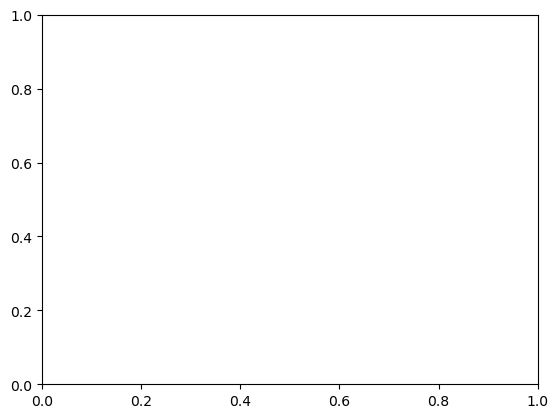

In [34]:
plt.boxplot(df.loc['rent'], vert=False)
plt.show()


In [6]:
df.loc['rent'][df.loc['rent'][('misc','Price/m2')]<3]

Target         Group 1                            Group 2            \
          Price Number of rooms Living Area Fully equipped kitchen Furnished   
Id                                                                             
8702546   500.0             8.0       395.0                   True      True   
8741440   650.0             9.0       300.0                   True      True   
8741518   575.0            12.0       450.0                   True      True   
9140183   500.0            11.0       420.0                   True      True   
9807593   400.0             9.0       257.0                  False     False   
...         ...             ...         ...                    ...       ...   
10305599  300.0             4.0       200.0                   True     False   
10159731   43.0             1.0        66.0                  False     False   
10250325  825.0             3.0       315.0                  False     False   
10313570   43.0             1.0        24.0                  False     False   
10314699  125.0             4.0       197.0                   True     False   

                                                                          \
         Open fire Terrace Area of the terrace Garden Area of the garden   
Id                                                                         
8702546      False    True                22.0   True               22.0   
8741440      False    True                 0.0  False                0.0   
8741518      False   False                 0.0   True               70.0   
9140183      False    True                15.0  False                0.0   
9807593      False    True                 0.0  False                0.0   
...            ...     ...                 ...    ...                ...   
10305599     False    True                10.0   True               40.0   
10159731     False    True                10.0   True                0.0   
10250325     False    True                 0.0   True                0.0   
10313570     False    True                 6.0  False                0.0   
10314699      True   False                 0.0  False                0.0   

                                                              \
         Surface of the land Number of facades Swimming pool   
Id                                                             
8702546                  0.0               NaN         False   
8741440                  0.0               NaN         False   
8741518                  0.0               NaN         False   
9140183                  0.0               2.0         False   
9807593                240.0               2.0         False   
...                      ...               ...           ...   
10305599               200.0               2.0         False   
10159731                 0.0               NaN         False   
10250325               404.0               NaN         False   
10313570                 0.0               2.0         False   
10314699              3300.0               4.0         False   

                        Group 1 Spatial          Group 2      misc  
          State of the building zipcode             type  Price/m2  
Id                                                                  
8702546   \nFraîchementrénové\n    4000           Studio  1.265823  
8741440   \nFraîchementrénové\n    1050           Studio  2.166667  
8741518   \nFraîchementrénové\n    1030           Studio  1.277778  
9140183         \nÀrafraîchir\n    4000           Studio  1.190476  
9807593                 \nBon\n    6000           Maison  1.556420  
...                         ...     ...              ...       ...  
10305599      \nExcellentétat\n    8300  Maisonbel-étage  1.500000  
10159731      \nExcellentétat\n    8800           Maison  0.651515  
10250325      \nExcellentétat\n    8850           Maison  2.619048  
10313570        \nÀrafraîchir\n    3001           Studio  1.791667  
10314699                \nBon

In [4]:
df=feature_engineering_0(df)

/home/dimi/BeCode/BeCode-real-estate-ML-cookiecutter/src/step_04_feature_engineering/feature_engineering.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(('Group 1', 'State of the building'),axis=1,inplace=True)
/home/dimi/BeCode/BeCode-real-estate-ML-cookiecutter/src/step_04_feature_engineering/feature_engineering.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(('my features', 'state note'),axis=1,inplace=True)


In [5]:
rent=df.loc['rent']
sale=df.loc['sale']

In [26]:
rent.describe()

Target                       Group 1                 my features  \
              Price      logPrice Number of rooms   Living Area   basic count   
count  1.301200e+04  13012.000000    13012.000000  13012.000000  13012.000000   
mean   1.125817e+06     13.804408        2.145481    117.591838      1.504688   
std    7.805987e+05      0.460763        1.008137    264.601067      0.757851   
min    2.500000e+04     10.126631        1.000000      9.000000      0.000000   
25%    7.500000e+05     13.527828        2.000000     76.000000      1.000000   
50%    8.900000e+05     13.698977        2.000000     95.000000      2.000000   
75%    1.200000e+06     13.997832        3.000000    130.000000      2.000000   
max    1.500000e+07     16.523561       12.000000  25325.000000      3.000000   

                                    
      advanced count         malus  
count   13012.000000  13012.000000  
mean        0.275822    -76.294267  
std         0.677440    325.265437  
min         0.000000 -18166.000000  
25%         0.000000   -180.000000  
50%         0.000000      0.000000  
75%         0.000000      0.000000  
max         4.000000  25325.000000

<AxesSubplot: >

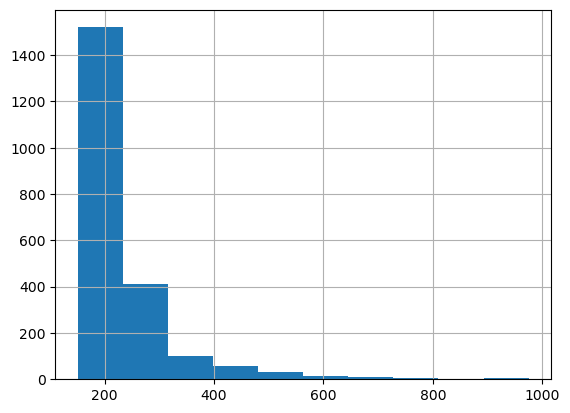

In [37]:
rent[('Group 1','Living Area')][
    (rent[('Group 1','Living Area')]>150)
    &
    (rent[('Group 1','Living Area')]<1000)
    ].hist()

In [13]:
rent.nlargest(5, 'malus')

KeyError: 'malus'

are there outliers left?

In [ ]:
rent

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [56]:
y=rent[[('Target','Price')]]
X=rent[['Group 1','my features']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [57]:
scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)

test_sc = scaler.transform(X_test)

In [58]:
model = RandomForestRegressor(n_estimators=100)

# Fit the model to the training data
model.fit(train_sc, y_train)

# Make predictions on the testing data
y_pred = model.predict(test_sc)

# print feature importance
print(model.feature_importances_)
    
# Calculate the R^2 score for the model
score = model.score(test_sc, y_test)
print("R^2 score: ", score)

/tmp/ipykernel_44442/2833113525.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_sc, y_train)


[0.11893407 0.59973073 0.07050536 0.05492104 0.1559088 ]
R^2 score:  0.5096841637455084
